In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [6]:
df = pd.read_csv(r'Housing.csv')

In [7]:
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [8]:
df.tail(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


Price: The selling price of the house in Pkr.

Area: The total property size in square feet.

Bedrooms: The number of bedrooms in the house.

Bathrooms: The number of bathrooms in the house.

Stories: The number of stories (excluding the basement).

Mainroad: Indicates whether the house faces a main road (1 = Yes, 0 = No).

Livingroom: Indicates if the house has a separate living or drawing room for guests (1 = Yes, 0 = No).

Basement: Shows whether the house has a basement (1 = Yes, 0 = No).

Hotwaterheating: Indicates if the house uses gas for hot water heating (1 = Yes, 0 = No).

Airconditioning: Indicates whether the house has central air conditioning (1 = Yes, 0 = No).

Parking: The number of cars that can be parked.

Prefarea: Indicates if the house is in a preferred neighborhood of the city (1 = Yes, 0 = No).

In [9]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [11]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


<AxesSubplot:>

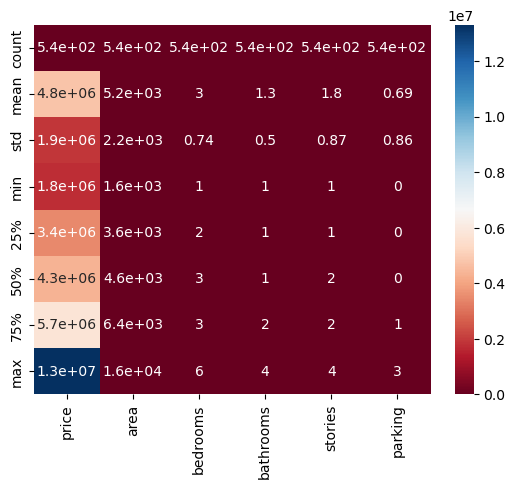

In [14]:
sns.heatmap(df.describe(), annot=True, cmap='RdBu')

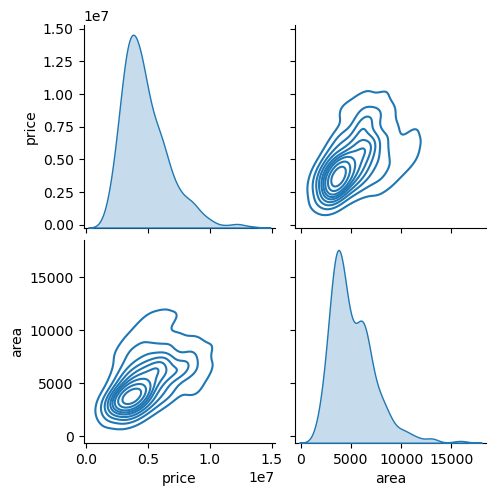

In [15]:
sns.pairplot(df[['price','area']], kind='kde')

In [16]:
def yes_or_no(column_name):
    for i in column_name:
        df[i] = df[i].apply(lambda x: 0 if x in ["NO",'no','No'] else 1 if x in ['YES', 'yes', 'Yes'] else 2)

In [17]:
yes_or_no(['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea'])

In [18]:
df['furnishingstatus'] = df['furnishingstatus'].apply(lambda x: 1 if x == 'semi-furnished' else 2 if x == 'furnished' else 0)

In [19]:
df['priceperunitarea'] = df['area'] / df['price']

In [20]:
df['haspremiumfeatures'] = (df[['guestroom', 'basement', 'hotwaterheating', 'airconditioning']].sum(axis=1) > 0).astype(int)

In [21]:
df.sample()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,priceperunitarea,haspremiumfeatures
49,7420000,7440,3,2,1,1,1,1,0,1,0,1,1,0.001003,1


<AxesSubplot:>

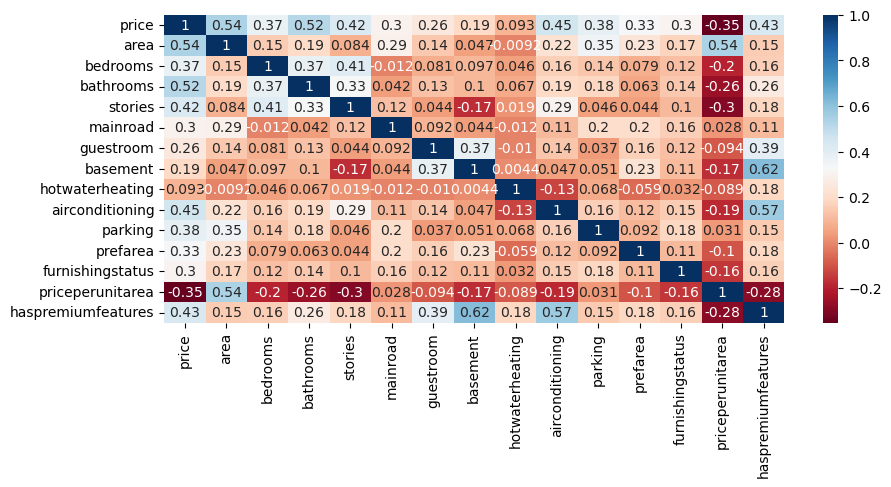

In [22]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(), annot=True, cmap='RdBu')

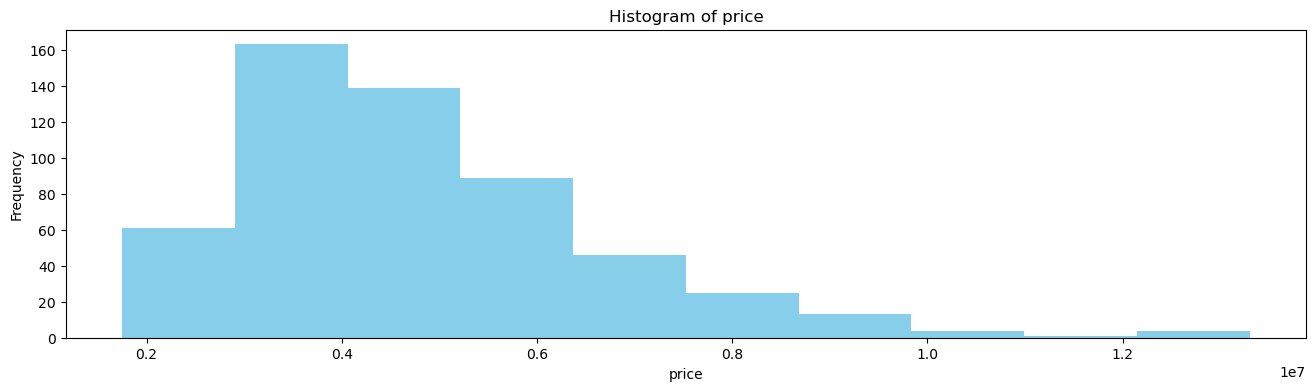

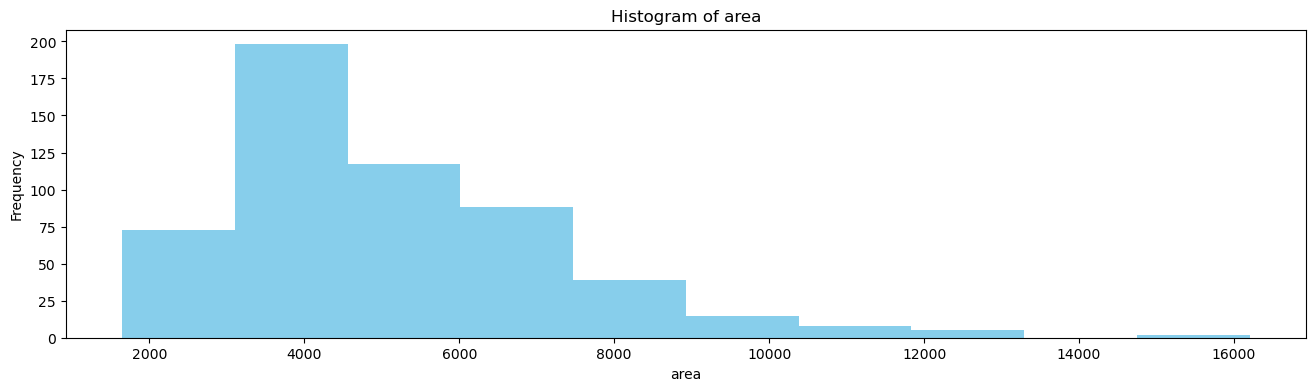

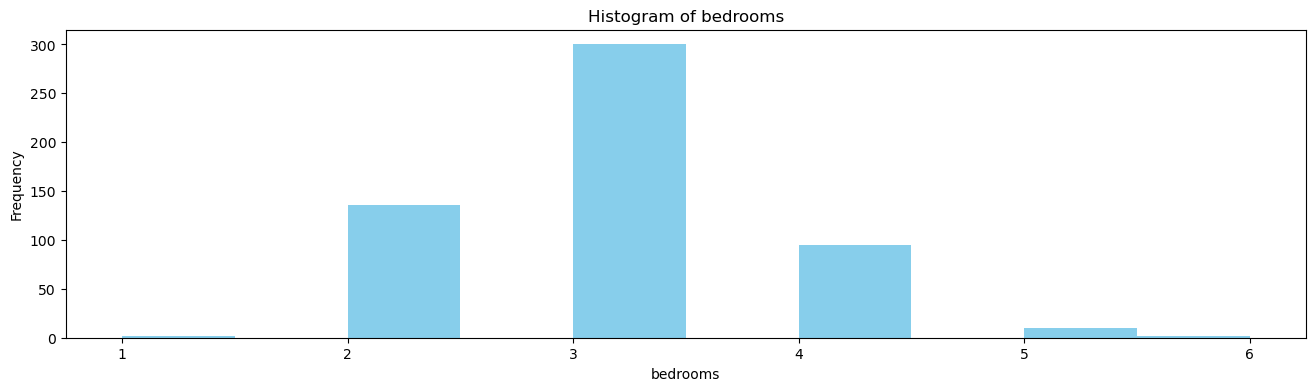

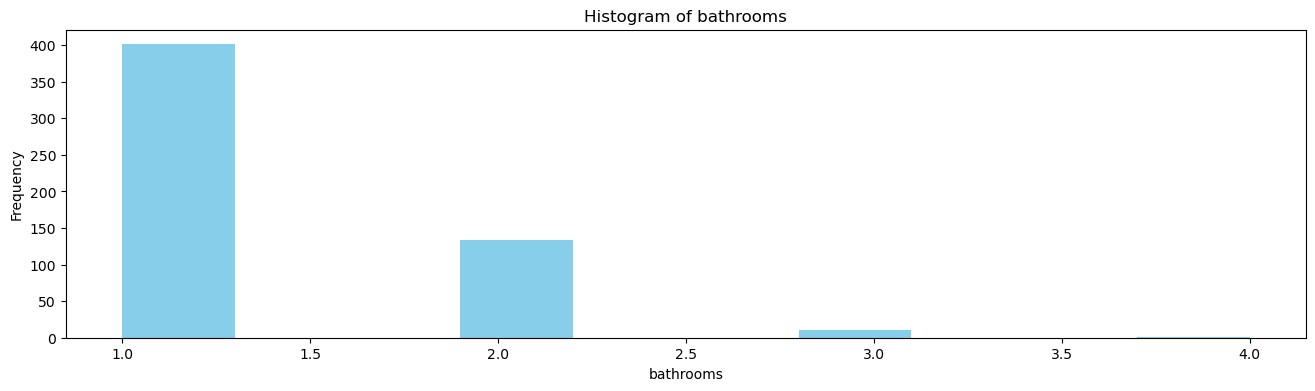

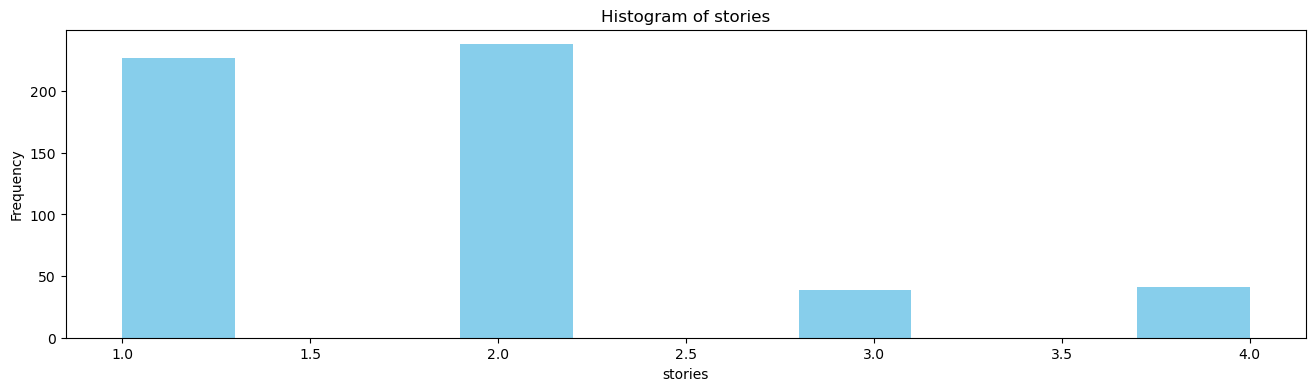

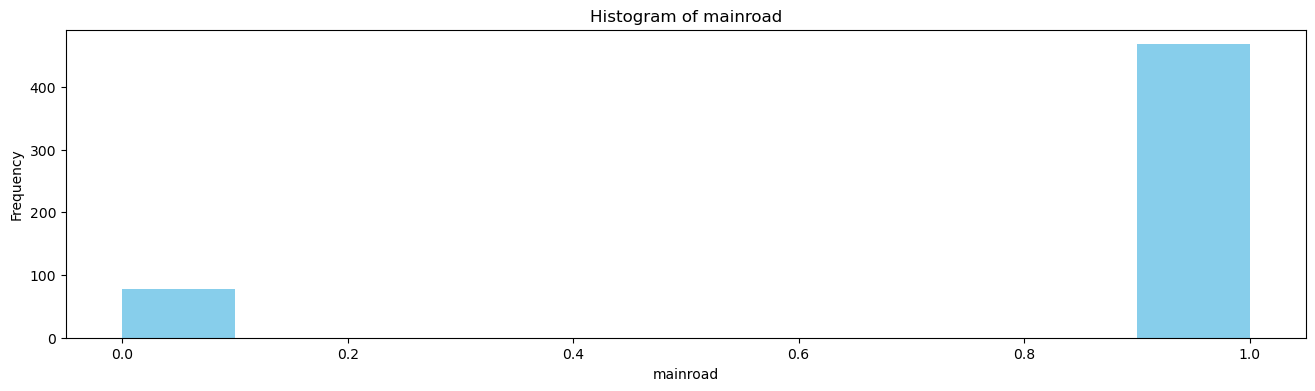

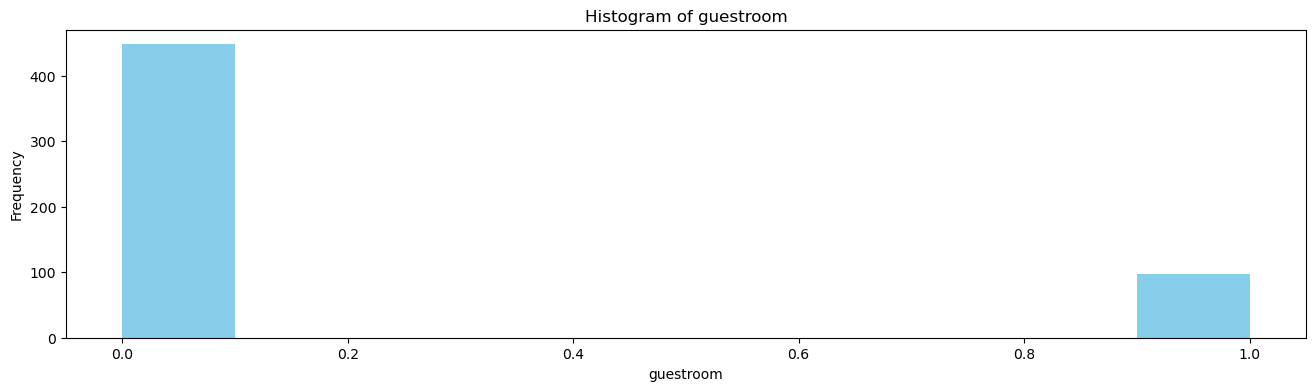

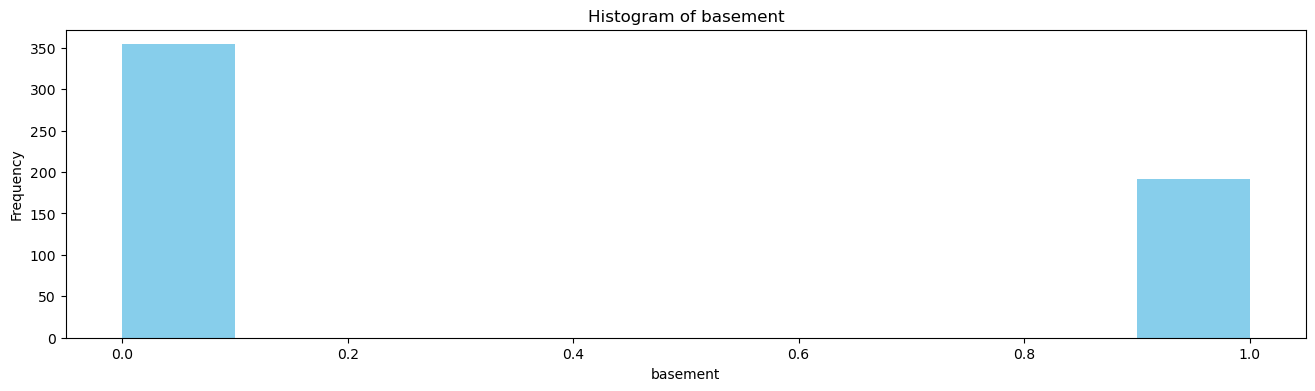

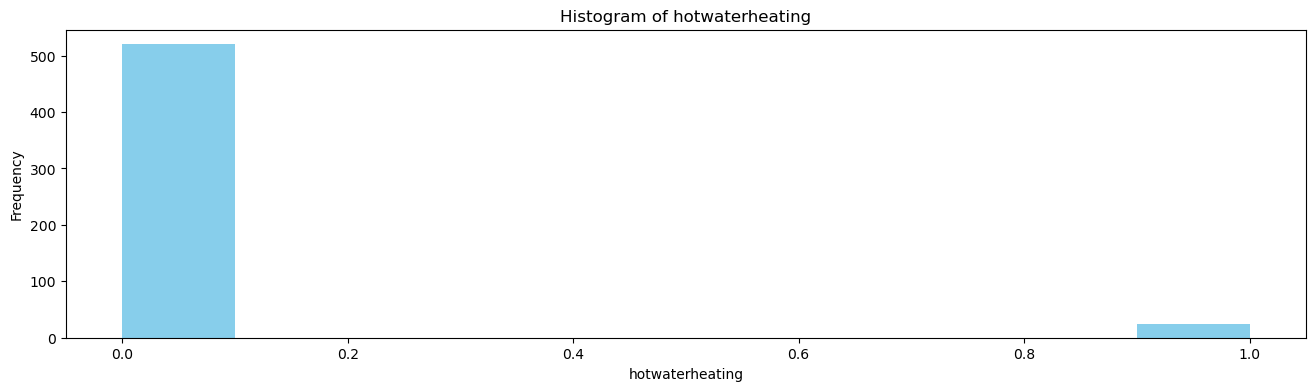

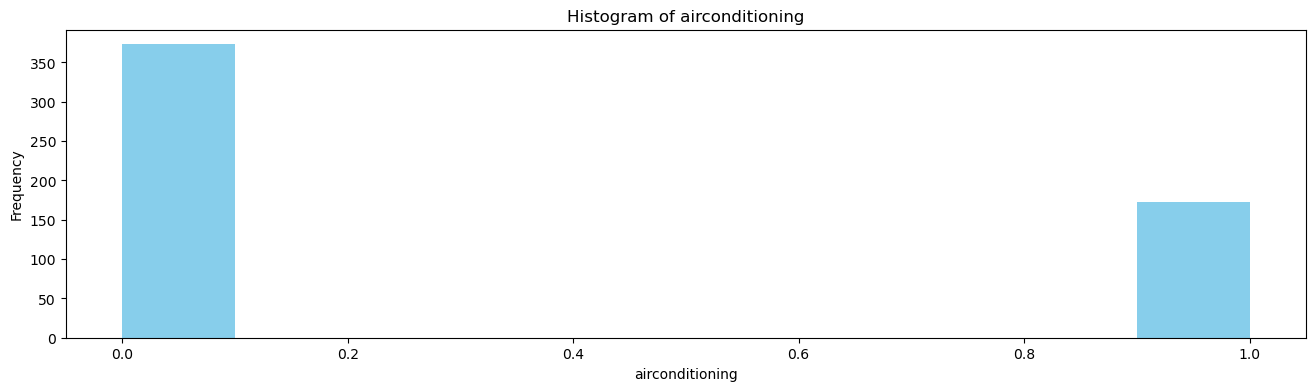

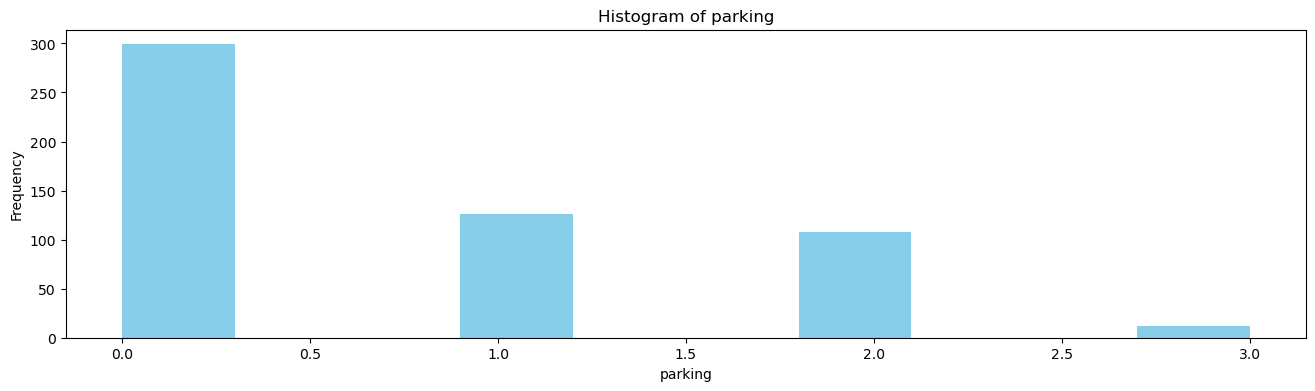

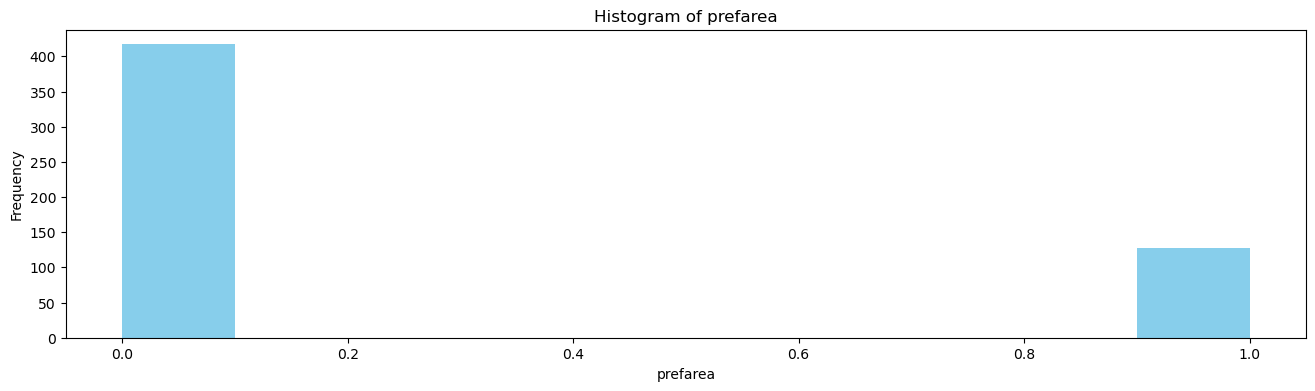

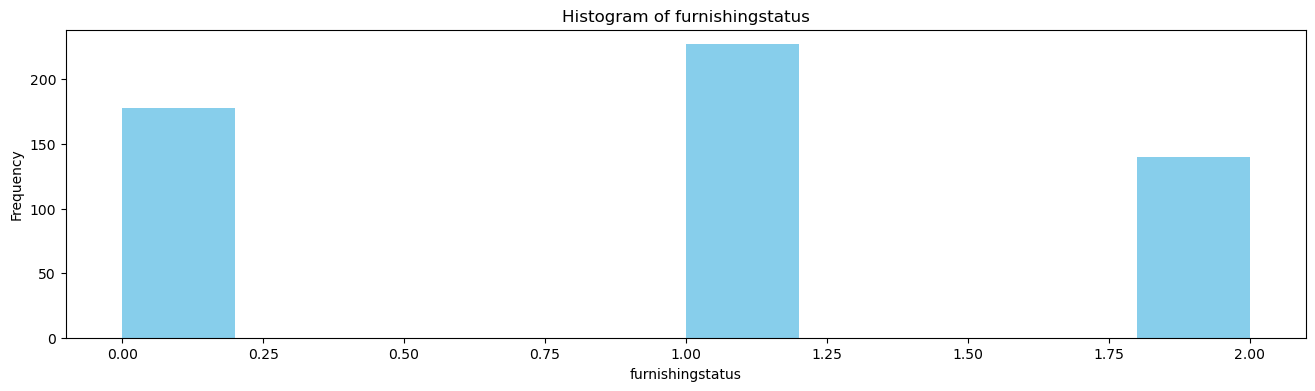

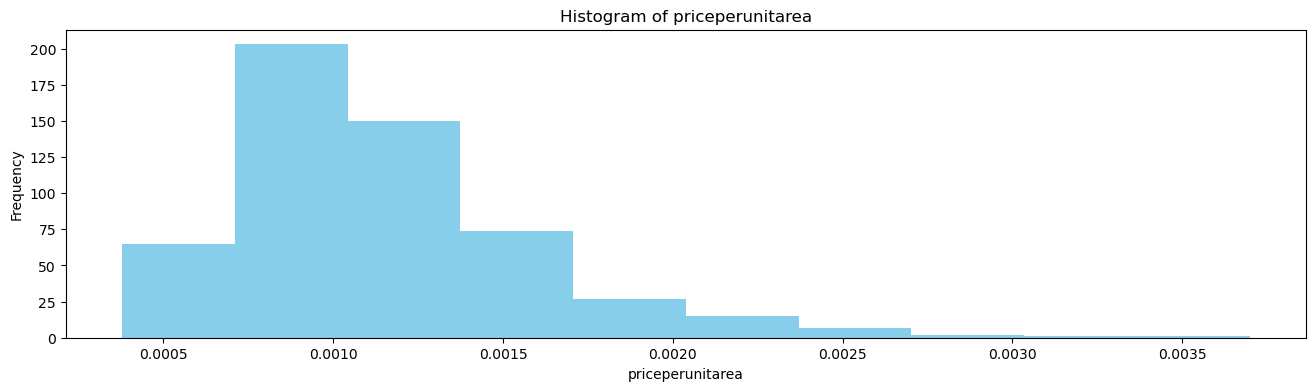

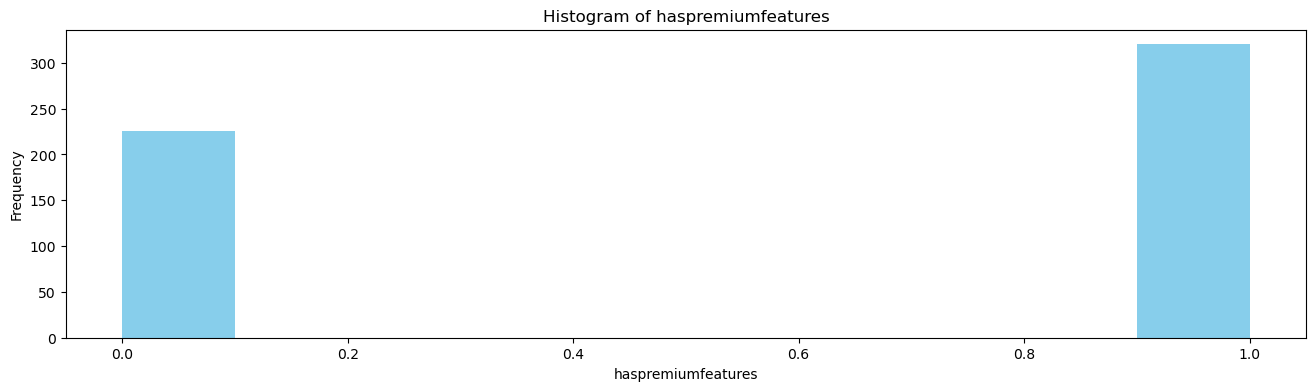

In [23]:
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        plt.figure(figsize=(16, 4))
        plt.hist(df[column], bins=10, color='skyblue')  # Using a valid color
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title('Histogram of ' + column)
        plt.show()

bedrooms
3           300
2           136
4            95
5            10
1             2
6             2
Name: count, dtype: int64


<AxesSubplot:xlabel='bedrooms'>

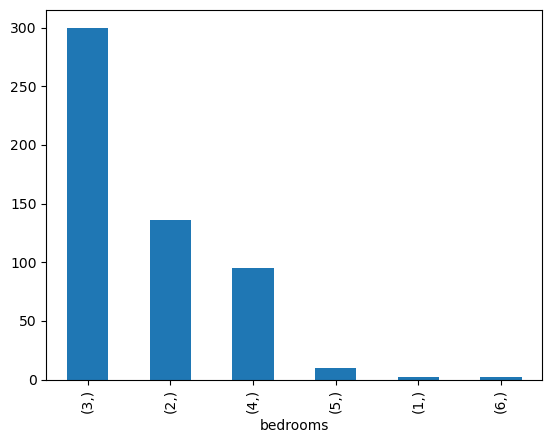

In [24]:
print(df[['bedrooms']].value_counts())
df[['bedrooms']].value_counts().plot(kind='bar')

bedrooms
1       5425000
2     493955000
3    1486379440
4     544327000
5      58198000
6       9583000
Name: price, dtype: int64


<AxesSubplot:xlabel='bedrooms'>

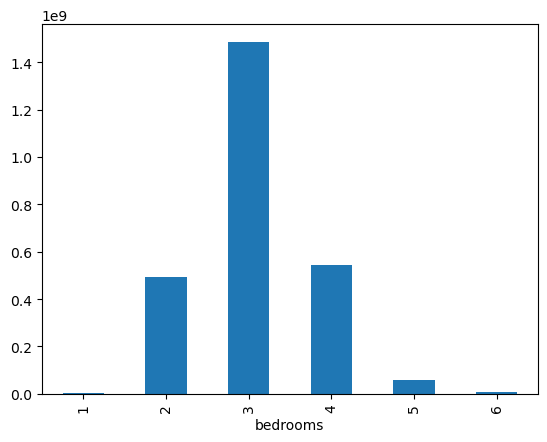

In [25]:
print(df.groupby('bedrooms')['price'].sum())
df.groupby('bedrooms')['price'].sum().plot(kind='bar')

<AxesSubplot:xlabel='bedrooms,bathrooms,stories'>

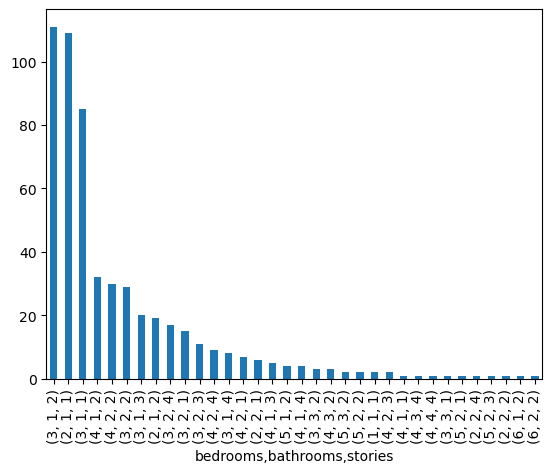

In [26]:
df[['bedrooms','bathrooms','stories']].value_counts().plot(kind='bar')

    bedrooms  bathrooms  stories  Total Price
0          1          1        1      5425000
1          2          1        1    387436000
2          2          1        2     72961000
3          2          2        1     24283000
4          2          2        2      2590000
5          2          2        4      6685000
6          3          1        1    385066500
7          3          1        2    458230500
8          3          1        3    102081000
9          3          1        4     54442500
10         3          2        1     88928000
11         3          2        2    173936000
12         3          2        3     71071000
13         3          2        4    125393940
14         3          3        1     10850000
15         3          3        2     16380000
16         4          1        1      3990000
17         4          1        2    150594500
18         4          1        3     22645000
19         4          1        4     20615000
20         4          2        1  

<AxesSubplot:title={'center':'Total Price by Bedrooms, Bathrooms and Stories'}, xlabel='bedrooms,bathrooms,stories'>

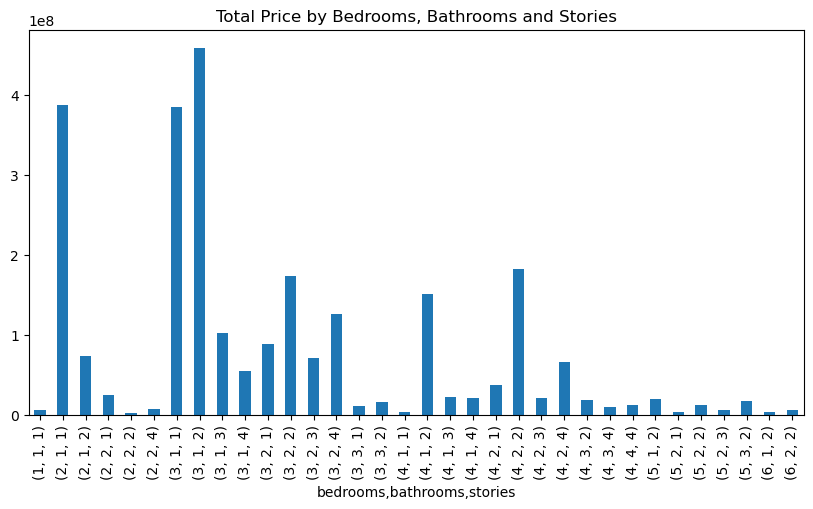

In [27]:
print(df.groupby(['bedrooms', 'bathrooms', 'stories'])['price'].sum().reset_index(name='Total Price'))
plt.figure(figsize=(10,5))
plt.title('Total Price by Bedrooms, Bathrooms and Stories')
df.groupby(['bedrooms','bathrooms','stories'])['price'].sum().plot(kind='bar')

<AxesSubplot:xlabel='bedrooms,bathrooms,stories,guestroom'>

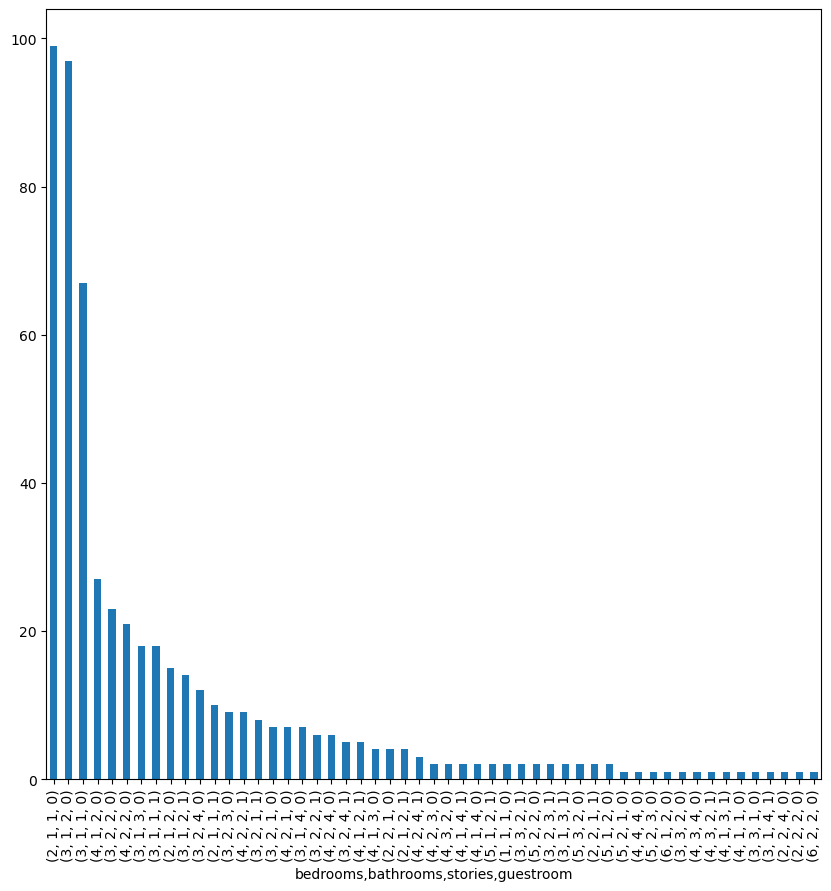

In [28]:
plt.figure(figsize=(10,10))
df[['bedrooms','bathrooms','stories','guestroom']].value_counts().plot(kind='bar')

    bedrooms  bathrooms  stories  guestroom  Total Price
0          1          1        1          0      5425000
1          2          1        1          0    343399000
2          2          1        1          1     44037000
3          2          1        2          0     56616000
4          2          1        2          1     16345000
5          2          2        1          0     16590000
6          2          2        1          1      7693000
7          2          2        2          0      2590000
8          2          2        4          0      6685000
9          3          1        1          0    283993500
10         3          1        1          1    101073000
11         3          1        2          0    391415500
12         3          1        2          1     66815000
13         3          1        3          0     90748000
14         3          1        3          1     11333000
15         3          1        4          0     46480000
16         3          1        

<AxesSubplot:title={'center':'Total Price by Bedrooms, Bathrooms, Stories, and Guestroom'}, xlabel='bedrooms,bathrooms,stories,guestroom'>

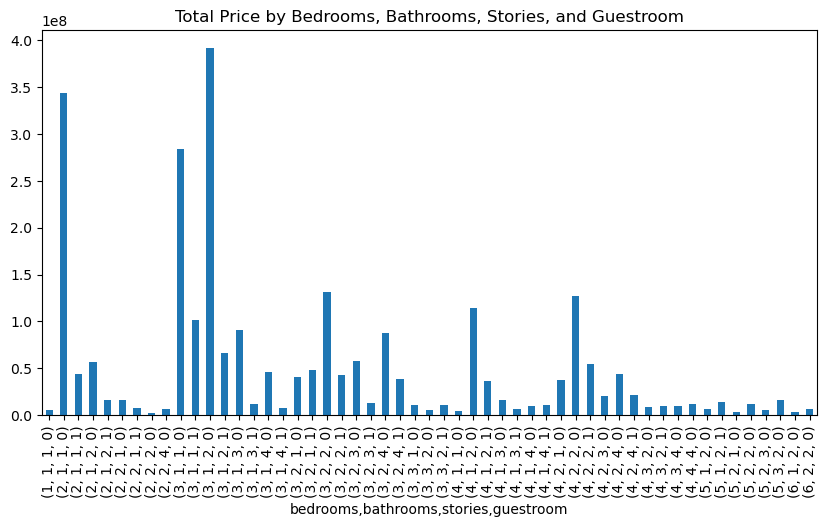

In [29]:
print(df.groupby(['bedrooms', 'bathrooms', 'stories', 'guestroom'])['price'].sum().reset_index(name='Total Price'))
plt.figure(figsize=(10,5))
plt.title('Total Price by Bedrooms, Bathrooms, Stories, and Guestroom')
df.groupby(['bedrooms','bathrooms','stories','guestroom'])['price'].sum().plot(kind='bar')

<AxesSubplot:xlabel='mainroad,basement,parking'>

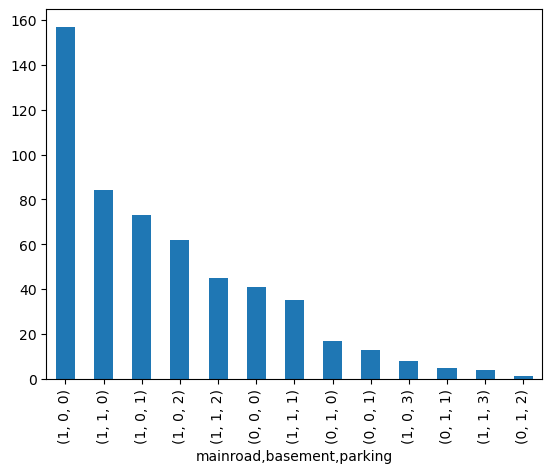

In [30]:
df[['mainroad','basement','parking']].value_counts().plot(kind='bar')

    mainroad  basement  parking  Total Price
0          0         0        0    128978150
1          0         0        1     40138000
2          0         1        0     65950500
3          0         1        1     21434000
4          0         1        2      5215000
5          1         0        0    644129850
6          1         0        1    388055500
7          1         0        2    351448440
8          1         0        3     43778000
9          1         1        0    397610500
10         1         1        1    204361500
11         1         1        2    280140000
12         1         1        3     26628000


<AxesSubplot:title={'center':'Total Price by Basement, Parking and Mainroad facility'}, xlabel='mainroad,basement,parking'>

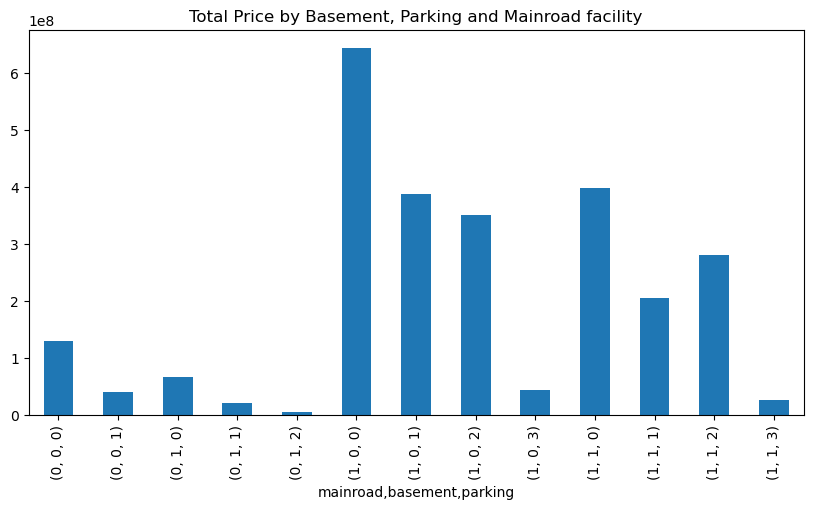

In [31]:
print(df.groupby(['mainroad','basement','parking'])['price'].sum().reset_index(name='Total Price'))
plt.figure(figsize=(10,5))
plt.title('Total Price by Basement, Parking and Mainroad facility')
df.groupby(['mainroad','basement','parking'])['price'].sum().plot(kind='bar')

<AxesSubplot:xlabel='airconditioning,hotwaterheating'>

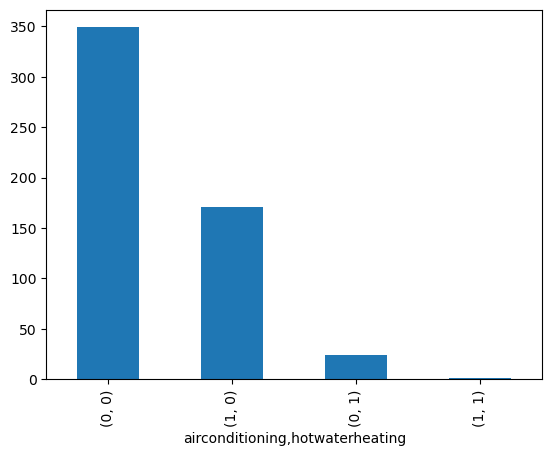

In [32]:
df[['airconditioning','hotwaterheating']].value_counts().plot(kind='bar')

   airconditioning  hotwaterheating  Total Price
0                0                0   1428234500
1                0                1    135359000
2                1                0   1030633940
3                1                1      3640000


<AxesSubplot:title={'center':'Total Price by Air-Conditioning and Hotwater-heating facility'}, xlabel='airconditioning,hotwaterheating'>

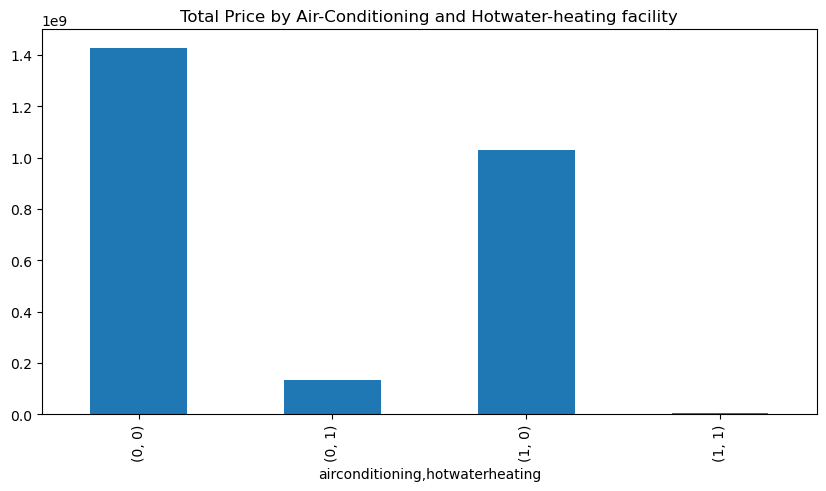

In [33]:
print(df.groupby(['airconditioning','hotwaterheating'])['price'].sum().reset_index(name='Total Price'))
plt.figure(figsize=(10,5))
plt.title('Total Price by Air-Conditioning and Hotwater-heating facility')
df.groupby(['airconditioning','hotwaterheating'])['price'].sum().plot(kind='bar')

<AxesSubplot:xlabel='prefarea,furnishingstatus'>

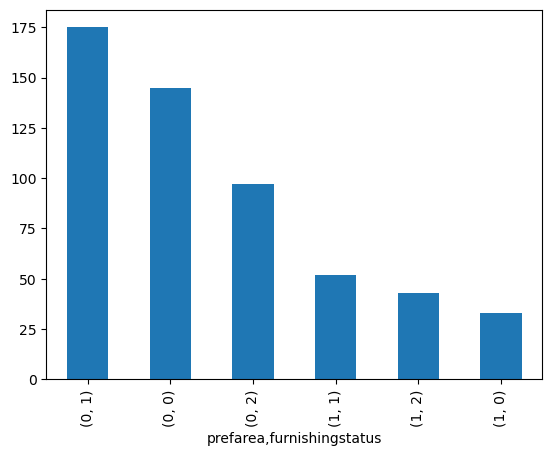

In [34]:
df[['prefarea','furnishingstatus']].value_counts().plot(kind='bar')

   prefarea  furnishingstatus  Total Price
0         0                 0    540995000
1         0                 1    807610650
2         0                 2    496743940
3         1                 0    173467000
4         1                 1    306397350
5         1                 2    272653500


<AxesSubplot:title={'center':'Total Price by Preferred Neighbourhood and Furnishing Status facility'}, xlabel='prefarea,furnishingstatus'>

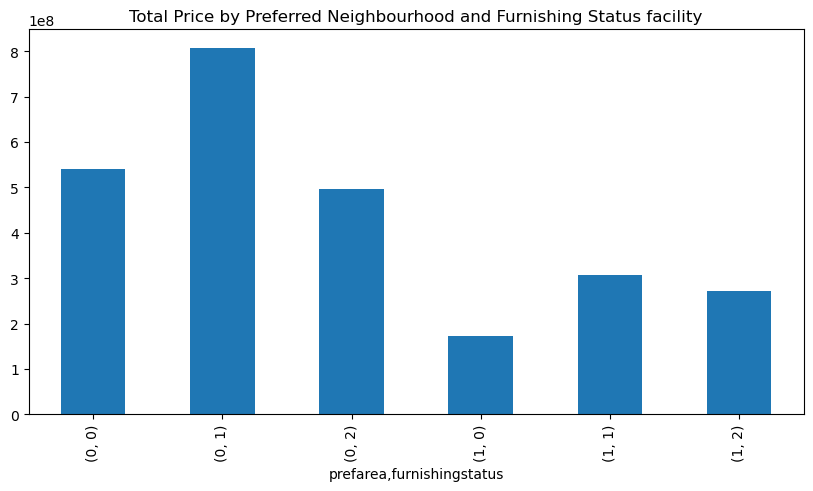

In [35]:
print(df.groupby(['prefarea','furnishingstatus'])['price'].sum().reset_index(name='Total Price'))
plt.figure(figsize=(10,5))
plt.title('Total Price by Preferred Neighbourhood and Furnishing Status facility')
df.groupby(['prefarea','furnishingstatus'])['price'].sum().plot(kind='bar')

<AxesSubplot:ylabel='count'>

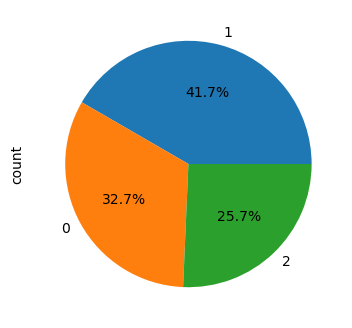

In [36]:
plt.figure(figsize=(16, 4))
df['furnishingstatus'].value_counts().plot(kind='pie',autopct='%0.01f%%', color='skyblue')

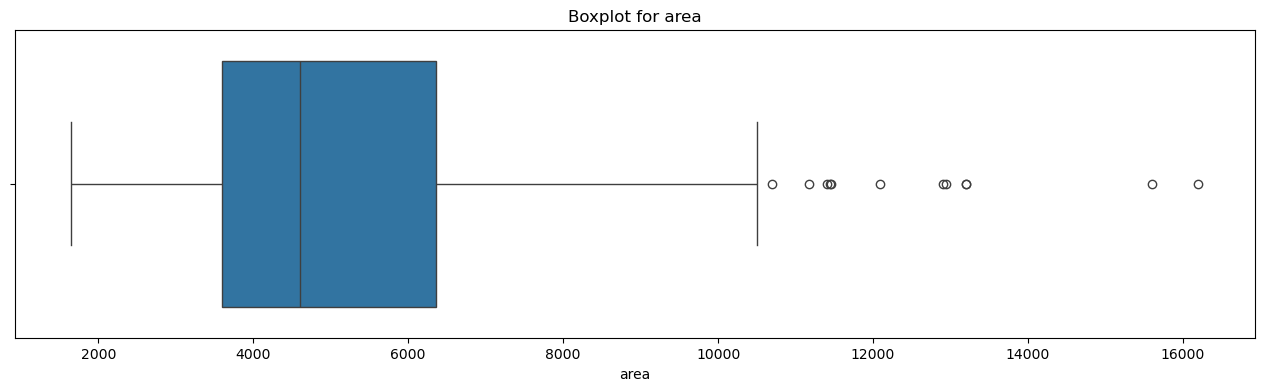

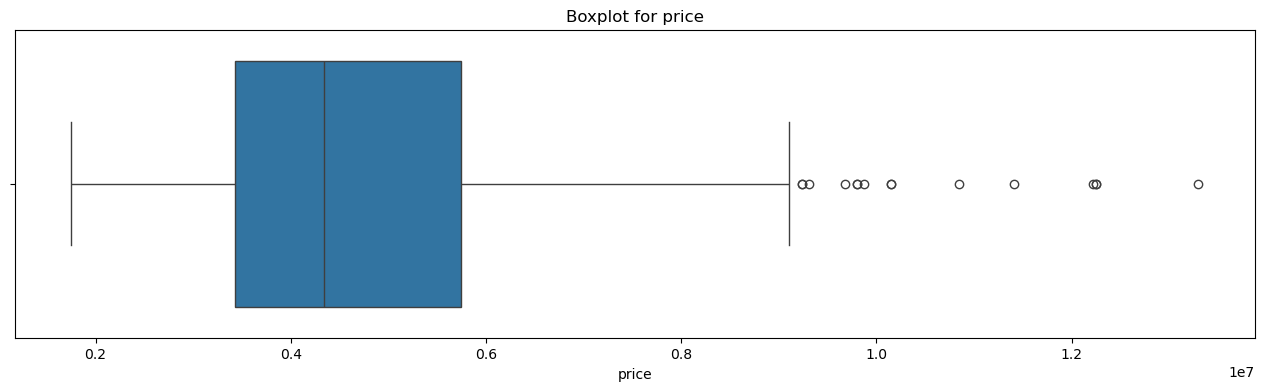

In [37]:
num_ftrs = ['area', 'price']
for i in num_ftrs:
    fig = plt.figure(figsize=(16, 4))
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

In [38]:
for i in num_ftrs:
    print(f'Five box summary for {i}: ')
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    minimum = df[i].min()
    maximum = df[i].max()

    print(f'''

    Q1 score: {Q1},
    ---------------------
    Q3 score: {Q3},
    ---------------------
    IQR score: {IQR},
    ---------------------
    Lower Bound score: {lower_bound},
    ---------------------
    Upper Bound score: {upper_bound},
    ---------------------
    Minimum Score: {minimum},
    ---------------------
    Maximum Score: {maximum}
    
    ''')

Five box summary for area: 


    Q1 score: 3600.0,
    ---------------------
    Q3 score: 6360.0,
    ---------------------
    IQR score: 2760.0,
    ---------------------
    Lower Bound score: -540.0,
    ---------------------
    Upper Bound score: 10500.0,
    ---------------------
    Minimum Score: 1650,
    ---------------------
    Maximum Score: 16200
    
    
Five box summary for price: 


    Q1 score: 3430000.0,
    ---------------------
    Q3 score: 5740000.0,
    ---------------------
    IQR score: 2310000.0,
    ---------------------
    Lower Bound score: -35000.0,
    ---------------------
    Upper Bound score: 9205000.0,
    ---------------------
    Minimum Score: 1750000,
    ---------------------
    Maximum Score: 13300000
    
    


In [39]:
outliers_price = (df['price'] < -35000) | (df['price'] > 9205000)
outliers_area = (df['area'] < -540) | (df['area'] > 10500)

In [40]:
combined_outliers = outliers_price | outliers_area

In [41]:
len(combined_outliers) 

545

In [42]:
df = df[~combined_outliers]

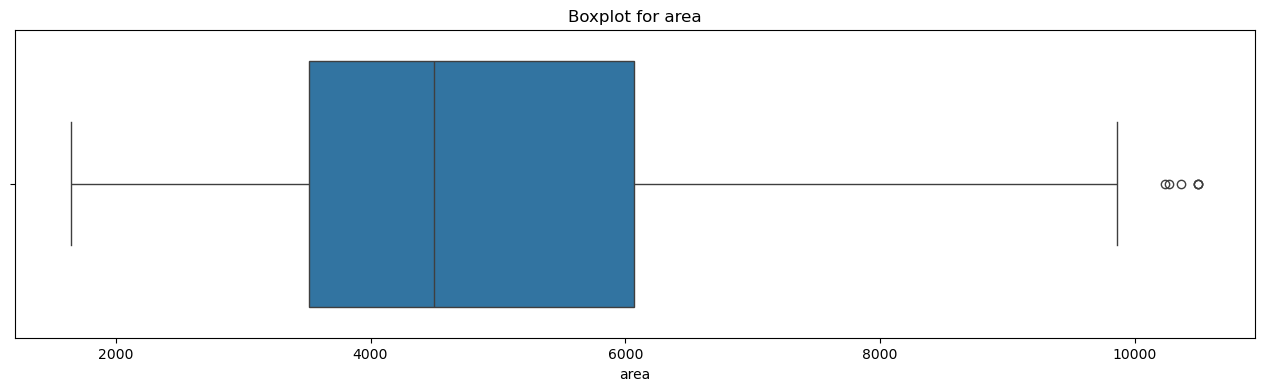

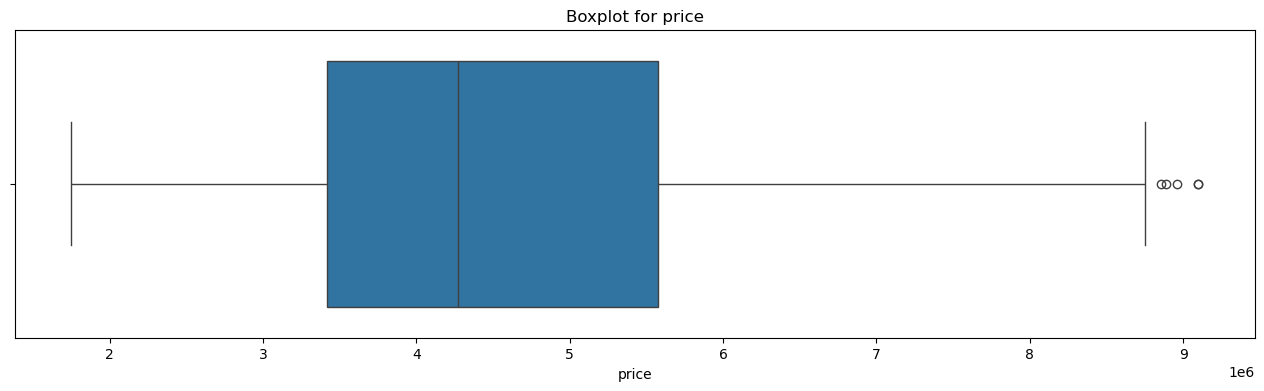

In [43]:
for i in num_ftrs:
    fig = plt.figure(figsize=(16, 4))
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

In [44]:
X = df.drop('price', axis=1)
y = df.price

In [45]:
y

15     9100000
16     9100000
17     8960000
18     8890000
19     8855000
        ...   
540    1820000
541    1767150
542    1750000
543    1750000
544    1750000
Name: price, Length: 520, dtype: int64

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
model = LinearRegression()

In [48]:
model.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 311472243058.526


In [50]:
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 558096.9835597806


In [51]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 388721.7393547193


In [52]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f'R2 score: {r2}')

R2 score: 0.9000382831961817


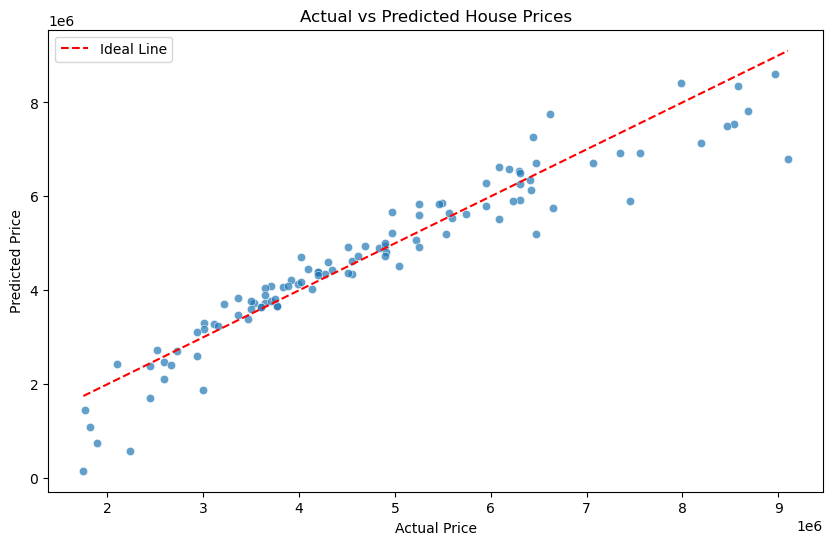

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

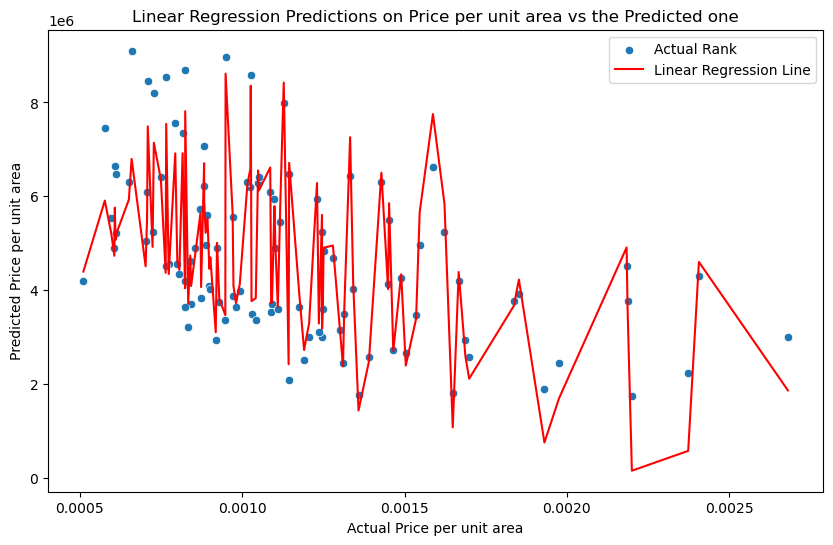

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['priceperunitarea'], y=y_test, label='Actual Rank')
sns.lineplot(x=X_test['priceperunitarea'], y=y_pred, color='red', label='Linear Regression Line')
plt.title(f'Linear Regression Predictions on Price per unit area vs the Predicted one')
plt.xlabel('Actual Price per unit area')
plt.ylabel('Predicted Price per unit area')
plt.legend()
plt.show()

In [55]:
X_test.sample(1)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,priceperunitarea,haspremiumfeatures
196,7686,3,1,1,1,1,1,1,0,0,0,1,0.001546,1


In [56]:
print('Predicted Price of a house: ')
result = model.predict([[7000,3,1,1,1,0,0,0,0,3,0,2,0.001667,0]])

Predicted Price of a house: 


C:\Users\abdul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [57]:
type(result[0])

numpy.float64

In [58]:
result = "{:,}".format(int(result[0]))
result

'4,388,127'

In [59]:
# Done